In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


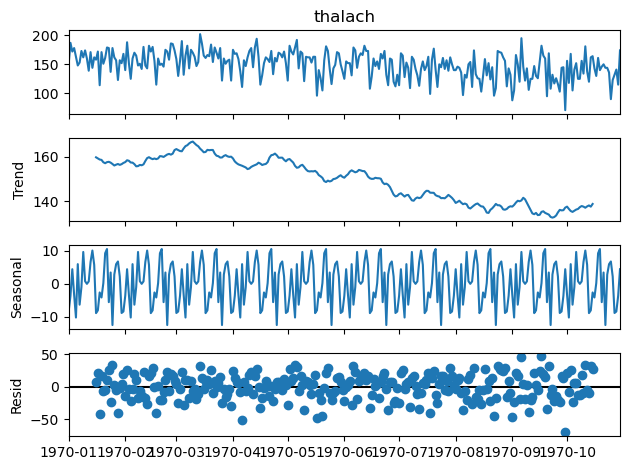

In [18]:
df['index'] = pd.to_datetime(df.index, unit='D')
df.set_index('index', inplace=True)

decomposition = seasonal_decompose(df['thalach'], model='additive', period=30)
decomposition.plot()
plt.show()

/Users/gauravreddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


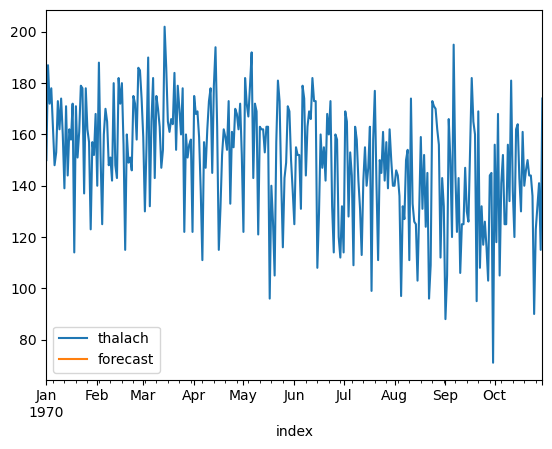

In [19]:
model = ExponentialSmoothing(df['thalach'], seasonal='additive', seasonal_periods=30).fit()
df['forecast'] = model.predict(start=len(df), end=len(df)+30)

df[['thalach', 'forecast']].plot()
plt.show()

In [20]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df = pd.read_csv('heart.csv')

comments = [
    "I am feeling much better after the treatment.",
    "The chest pain is unbearable.",
    "I am worried about my heart condition.",
    "The medication has helped a lot.",
    "I have no symptoms and feel healthy.",
    "The doctor is very kind and supportive.",
    "The waiting time is too long.",
    "I am happy with the overall service.",
    "The hospital environment is clean and comforting.",
    "I feel anxious about my upcoming surgery."
]

import random
df['patient_comments'] = [random.choice(comments) for _ in range(len(df))]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_comments
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,I feel anxious about my upcoming surgery.
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,The hospital environment is clean and comforting.
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,The chest pain is unbearable.
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,The waiting time is too long.
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,The medication has helped a lot.


In [21]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['sentiments'] = df['patient_comments'].apply(lambda x: sid.polarity_scores(x)['compound'])

df[['patient_comments', 'sentiments']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gauravreddy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,patient_comments,sentiments
0,I feel anxious about my upcoming surgery.,-0.2500
1,The hospital environment is clean and comforting.,0.6597
2,The chest pain is unbearable.,-0.5106
3,The waiting time is too long.,0.0000
4,The medication has helped a lot.,0.0000


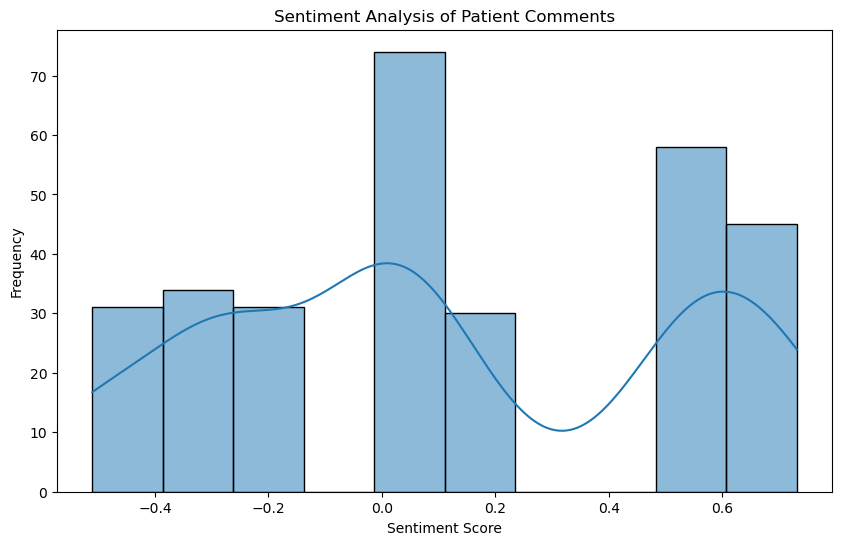

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiments'], bins=10, kde=True)
plt.title('Sentiment Analysis of Patient Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['patient_comments'])

words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

word_counts = words_df.sum().sort_values(ascending=False)

print(word_counts.head(10))

feel          61
lot           43
helped        43
medication    43
worried       34
condition     34
heart         34
treatment     33
feeling       33
better        33
dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
numerical_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


/Users/gauravreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


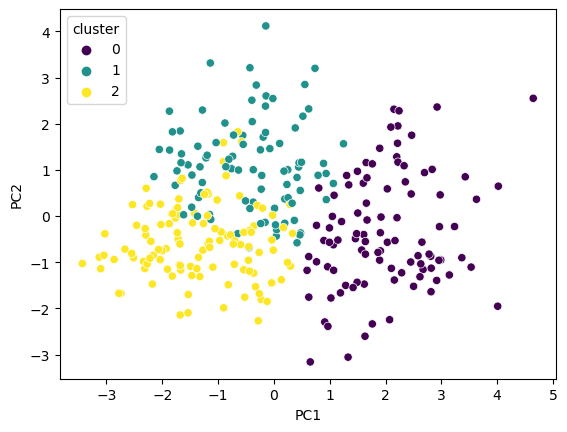

In [26]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)
df['cluster'] = kmeans.labels_

# Plot the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

# Plot the PCA components
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.show()